Simple Linear Regression

In [126]:
from matplotlib import pyplot as plt
import numpy as np
import time

Plot the dataset

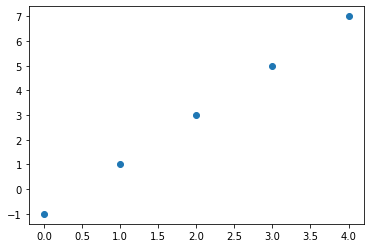

In [127]:
X = np.array(range(5))
y = np.array(range(-1,8,2))
plt.scatter(X,y)

Cost Function

In [128]:
def costLinearRegression(X, y, theta):
    m = len(y)
    J = np.dot(X,theta)
    J = np.subtract(J, y)
    J = np.power(J,2)
    J = np.sum(J)
    J = J/(2*m)
    return J

Random linear equation with theta = [1, 1]

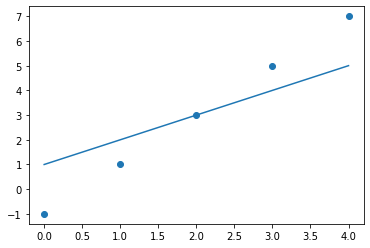

In [129]:
#data
X = np.array(range(5))
y = np.array(range(-1,8,2))
plt.scatter(X,y)

#line
theta = np.array([1,1])
A = np.linspace(0,4)
B = theta[0]+theta[1]*A
plt.plot(A,B)

Calculate Cost for theta = [1, 1]

In [130]:
#add new collom to use bias
X = np.array(range(5))
X = np.stack((np.ones(5), X), axis=1)
y = np.array(range(-1,8,2))
Cost = costLinearRegression(X,y, theta)
print(Cost)

1.0


Gradient Decent

In [144]:
def decent(X, y, theta, alpha, iteration):
    cost = [] #save cost every iteration
    feature = len(X[0]) #number of feature
    temp = np.zeros(feature) #save new theta temporary
    m = len(y) #number of dataset
    for i in range(iteration):
        plt.clf
        for n in range(feature):
            J = np.dot(X,theta)
            J = np.subtract(J,y)
            J = np.vdot(J, X[:,n])
            J = (alpha * (1/m) * J)
            temp[n] = theta[n] - J
        for n in range(feature):
            theta[n] = temp[n]
        
        ##for graph
        #A = np.linspace(0,4)
        #B = theta[0]+theta[1]*A
        #plt.scatter(X[:,1],y)
        #plt.plot(A,B)
        #plt.draw()
        #plt.pause(0.05)
        #plt.clf()

        ##for cost
        Cost = costLinearRegression(X,y, theta)
        cost.append(Cost)
    A = np.array(range(len(cost)))
    plt.plot(A,cost)
    print(Cost)
    return theta      
        

0.0017146836586119062
[-0.8988464813923502, 1.964517261584998]


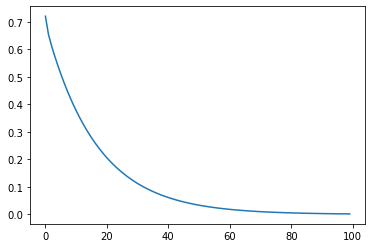

In [145]:
X = np.array(range(5))
X = np.stack((np.ones(5), X), axis=1)
y = np.array(range(-1,8,2))

#param
alpha = 0.1
iteration = 100
theta = [1,1]

theta = decent(X,y, theta, alpha, iteration)
print(theta)

Plot the line with new theta

[-0.8988464813923502, 1.964517261584998]


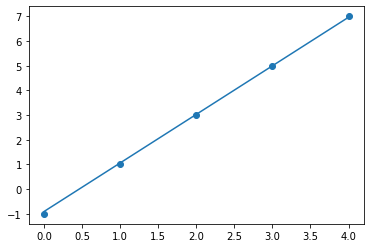

In [133]:
#data
X = np.array(range(5))
y = np.array(range(-1,8,2))
plt.scatter(X,y)

#line
#theta = np.array([-0.8988464813923502, 1.964517261584998])
A = np.linspace(0,4)
B = theta[0]+theta[1]*A
plt.plot(A,B)
print(theta)

Implementation with non linear model

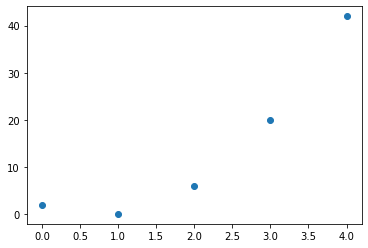

In [134]:
X = np.array(range(5))
y = np.array(range(-1,8,2))
y = (y*y) - y
plt.scatter(X,y)

[0.8701068330503946, -4.5570890956243995, 3.687687955295505]


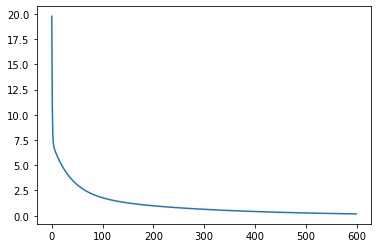

In [135]:
X0 = np.ones(5)
X1 = np.array(range(5))
X2 = X1*X1

X = np.stack((X0, X1, X2), axis=1)
y = np.array(range(-1,8,2))
y = (y*y) - y

#param
alpha = 0.02
iteration = 600
theta = [1,1,1]

theta = decent(X,y, theta, alpha, iteration)
print(theta)

0.18101493935209384


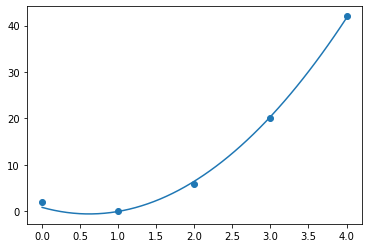

In [136]:
#cost
X0 = np.ones(5)
X1 = np.array(range(5))
X2 = X1*X1
X = np.stack((X0, X1, X2), axis=1)
y = np.array(range(-1,8,2))
y = (y*y) - y
print(costLinearRegression(X,y, theta))

#data
X = np.array(range(5))
y = np.array(range(-1,8,2))
y = (y*y) - y
plt.scatter(X,y)

#line
#theta = np.array([-0.42754453546307153, -2.525736947239201, 3.222685718955656])
A = np.linspace(0,4)
B = theta[0] + theta[1]*A + theta[2]*A*A
plt.plot(A,B)

Implementation with sklearn

In [137]:
from sklearn.linear_model import LinearRegression

X0 = np.ones(5)
X1 = np.array(range(5))
X2 = X1*X1
X = np.stack((X0, X1, X2), axis=1)
y = np.array(range(-1,8,2))
y = (y*y) - y

reg = LinearRegression().fit(X, y)

print(reg.score(X, y), "score")
print(reg.coef_, "coef")
#reg.intercept_
#reg.predict(np.array([[3, 5]]))


1.0 score
[ 0. -6.  4.] coef


2.0


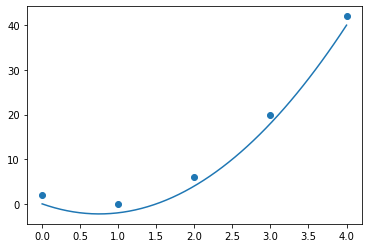

In [138]:
theta = [0,-6, 4]

#cost
X0 = np.ones(5)
X1 = np.array(range(5))
X2 = X1*X1
X = np.stack((X0, X1, X2), axis=1)
y = np.array(range(-1,8,2))
y = (y*y) - y
print(costLinearRegression(X,y, theta))

#data
X = np.array(range(5))
y = np.array(range(-1,8,2))
y = (y*y) - y
plt.scatter(X,y)

#line
#theta = np.array([-0.42754453546307153, -2.525736947239201, 3.222685718955656])
A = np.linspace(0,4)
B = theta[0] + theta[1]*A + theta[2]*A*A
plt.plot(A,B)

DATASET

In [139]:
from sklearn import datasets as ds

In [140]:
A = ds.load_diabetes()

In [141]:
print(A['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [142]:
print(A['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [143]:
#data already clean
X = A['data']
y = A['target']